<a href="https://colab.research.google.com/github/itzrnvr/opencv-labs/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PIC_PATH = 'pic.jpeg'

In [3]:
image_gray = cv2.imread(PIC_PATH, 0)

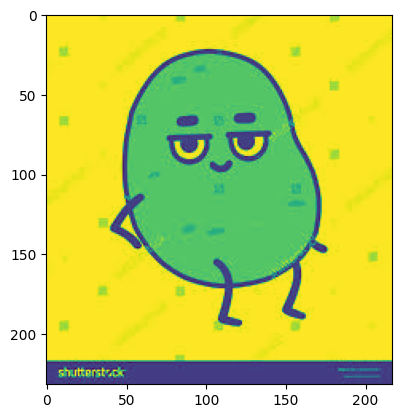

In [4]:
plt.imshow(image_gray)

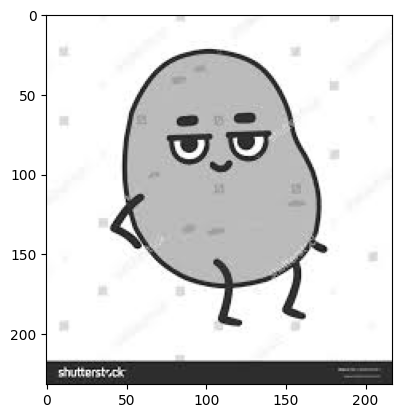

In [5]:
rgb_image = cv2.cvtColor(image_gray, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [6]:
gray_from_rgb = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

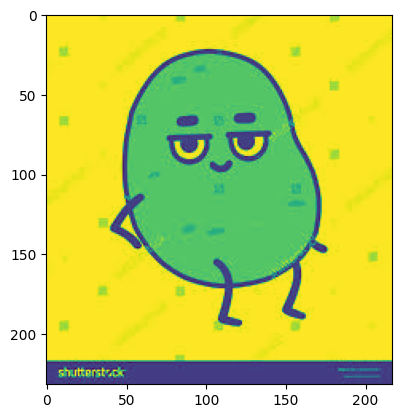

In [7]:
plt.imshow(gray_from_rgb)

In [8]:
binary_thresh = cv2.threshold(gray_from_rgb, 127, 255, cv2.THRESH_BINARY)[1]

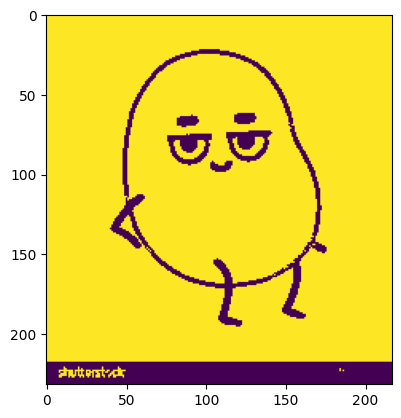

In [9]:
plt.imshow(binary_thresh)

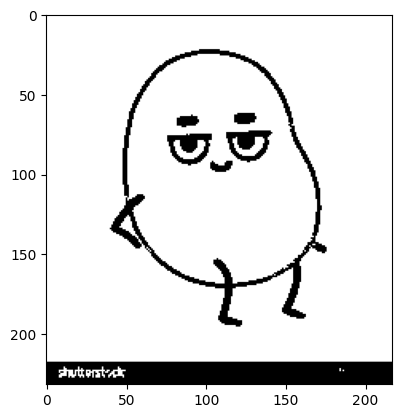

In [10]:
plt.imshow(binary_thresh, cmap='gray')

Image dimensions: 232x217
Total pixels: 50344
Black pixels: 5654
Ratio of black pixels: 0.112


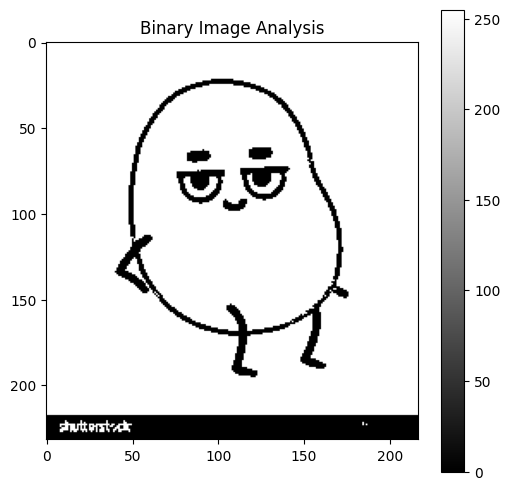

In [11]:
h_img, w_img = binary_thresh.shape
n_pixels = h_img * w_img
n_black = np.count_nonzero(binary_thresh == 0)
frac_black = n_black / n_pixels
print(f"Image dimensions: {h_img}x{w_img}")
print(f"Total pixels: {n_pixels}")
print(f"Black pixels: {n_black}")
print(f"Ratio of black pixels: {frac_black:.3f}")
plt.figure(figsize=(6,6))
plt.imshow(binary_thresh, cmap='gray')
plt.title('Binary Image Analysis')
plt.colorbar()
plt.show()

## Task 2

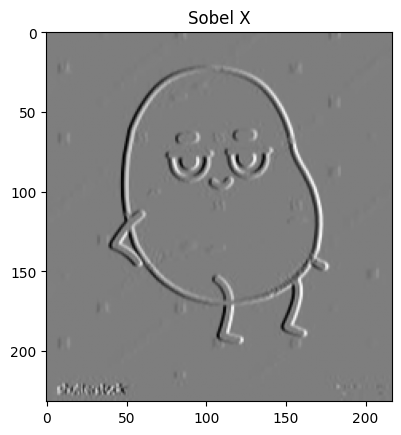

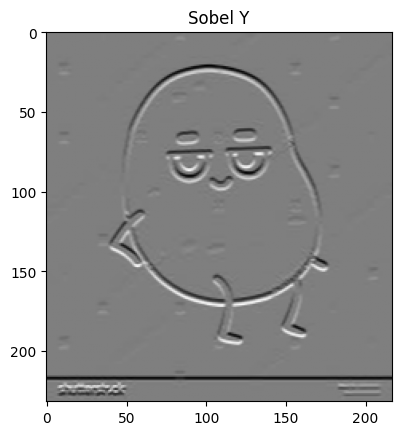

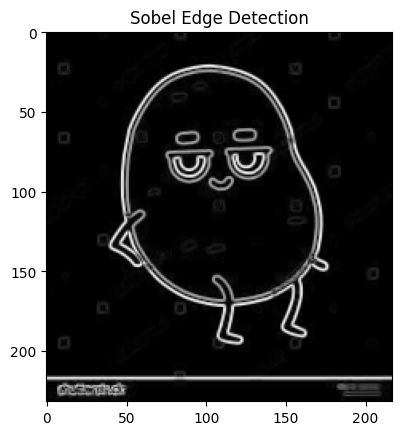

In [12]:
sx = cv2.Sobel(gray_from_rgb, cv2.CV_64F, 1, 0, ksize=3)
sy = cv2.Sobel(gray_from_rgb, cv2.CV_64F, 0, 1, ksize=3)
smag = np.sqrt(np.square(sx) + np.square(sy))
smag = cv2.normalize(smag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(sx, cmap='gray')
plt.title('Sobel X')
plt.show()
plt.imshow(sy, cmap='gray')
plt.title('Sobel Y')
plt.show()
plt.imshow(smag, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()

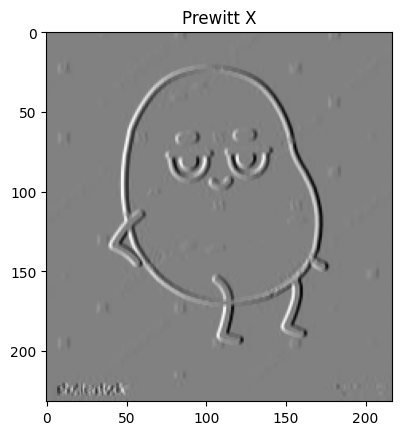

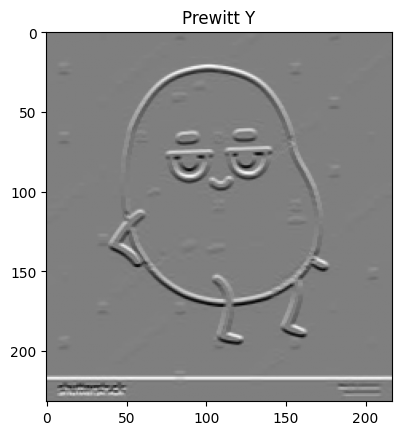

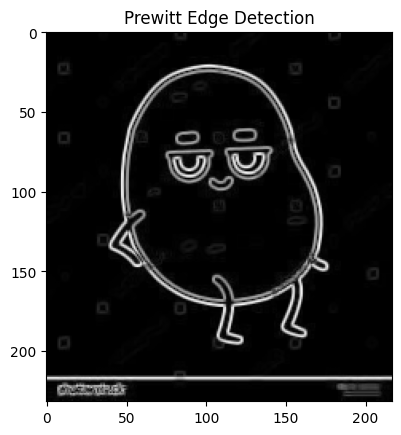

In [13]:
prewittx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
prewitty = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
pwx = cv2.filter2D(gray_from_rgb, cv2.CV_32F, prewittx)
pwy = cv2.filter2D(gray_from_rgb, cv2.CV_32F, prewitty)
pwmag = np.sqrt(pwx**2+pwy**2)
pwmag = cv2.normalize(pwmag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(pwx, cmap='gray')
plt.title('Prewitt X')
plt.show()
plt.imshow(pwy, cmap='gray')
plt.title('Prewitt Y')
plt.show()
plt.imshow(pwmag, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.show()


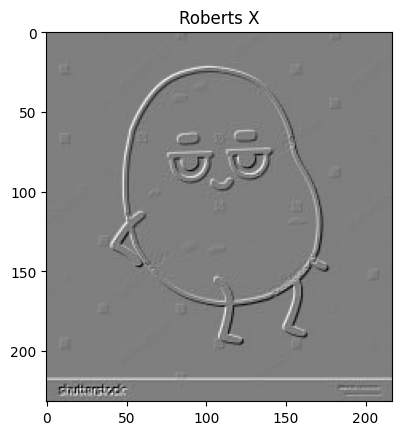

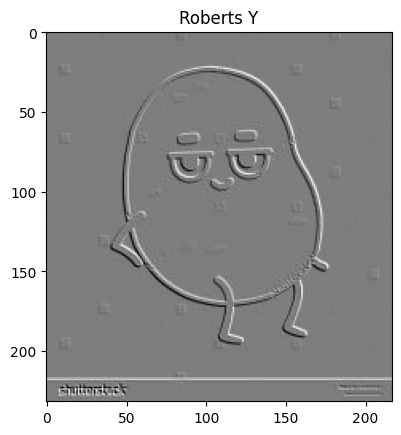

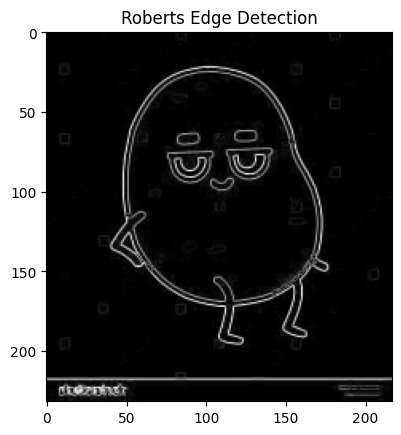

In [14]:
robertsx = np.array([[1,0],[0,-1]], dtype=np.float32)
robertsy = np.array([[0,1],[-1,0]], dtype=np.float32)
rbx = cv2.filter2D(gray_from_rgb, cv2.CV_32F, robertsx)
rby = cv2.filter2D(gray_from_rgb, cv2.CV_32F, robertsy)
rbmag = np.sqrt(rbx**2 + rby**2)
rbmag = cv2.normalize(rbmag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
plt.imshow(rbx, cmap='gray')
plt.title('Roberts X')
plt.show()
plt.imshow(rby, cmap='gray')
plt.title('Roberts Y')
plt.show()
plt.imshow(rbmag, cmap='gray')
plt.title('Roberts Edge Detection')
plt.show()

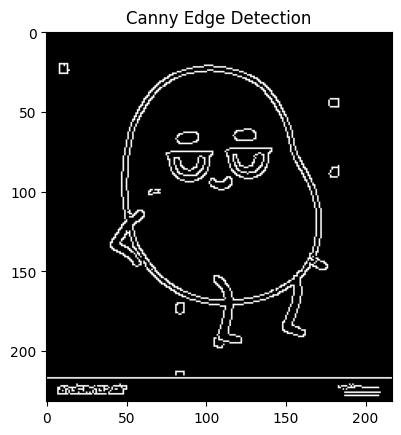

In [16]:
canny_result = cv2.Canny(gray_from_rgb, 100, 200)
plt.imshow(canny_result, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

In [17]:
def plot_imgs(imglist, titlelist, nrow, ncol):
    plt.figure(figsize=(15, 10))
    for idx, (im, ti) in enumerate(zip(imglist, titlelist)):
        plt.subplot(nrow, ncol, idx + 1)
        plt.imshow(im, cmap='gray')
        plt.title(ti)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

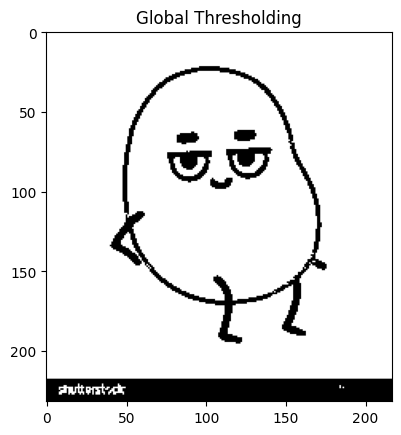

In [18]:
_, glb_thresh = cv2.threshold(gray_from_rgb, 128, 255, cv2.THRESH_BINARY)
plt.imshow(glb_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.show()

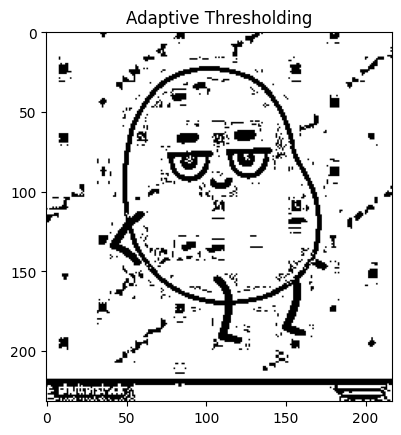

In [19]:
ada_thresh = cv2.adaptiveThreshold(gray_from_rgb, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
plt.imshow(ada_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.show()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 47,  47,  47],
        [ 46,  46,  46],
        [ 44,  44,  44],
        ...,
        [ 44,  44,  44],
        [ 47,  47,  47],
        [ 45,  45,  45]],

       [[ 46,  46,  46],
        [ 43,  43,  43],
        [ 38,  38,  38],
        ...,
        [ 45,  45,  45],
        [ 50,  50,  50],
        [ 45,  45,  45]],

       [[ 46,  46,  46],
        [ 46,  46,  46],
        [ 46,  46,  46],
        ...,
        [ 42,  42,  42],
        [ 41,  41,  41],
        [ 45,  45,  45]]], dtype=uint8)
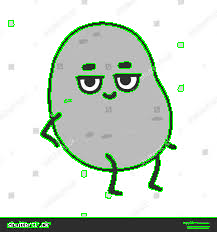

In [20]:
edg = cv2.Canny(gray_from_rgb, 100, 200)
contours, _ = cv2.findContours(edg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
colored_edges = cv2.cvtColor(gray_from_rgb, cv2.COLOR_GRAY2BGR)
cv2.drawContours(colored_edges, contours, -1, (0,255,0), 1)

## Watershed Algo

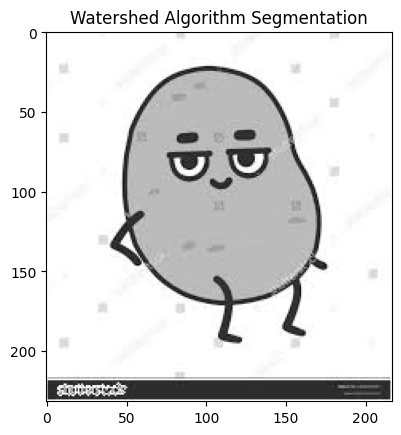

In [21]:
_, bininv = cv2.threshold(gray_from_rgb, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist = cv2.distanceTransform(bininv, cv2.DIST_L2, 5)
_, fg = cv2.threshold(dist, 0.7*dist.max(), 255, 0)
fg = np.uint8(fg)
bg = cv2.subtract(bininv, fg)
_, marks = cv2.connectedComponents(fg)
marks = marks + 1
marks[bg == 255] = 0
marks = cv2.watershed(cv2.cvtColor(gray_from_rgb, cv2.COLOR_GRAY2BGR), marks)
gray_from_rgb[marks == -1] = [255]
plt.imshow(gray_from_rgb, cmap='gray')
plt.title('Watershed Algorithm Segmentation')
plt.show()